In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_cardio=pd.read_csv("cardio_train.csv")
df_cardio

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69296,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69297,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69298,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69299,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [3]:
df_cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [4]:
df_cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 13 columns):
id             69301 non-null int64
age            69301 non-null int64
gender         69301 non-null int64
height         69301 non-null int64
weight         69301 non-null float64
ap_hi          69301 non-null int64
ap_lo          69301 non-null int64
cholesterol    69301 non-null int64
gluc           69301 non-null int64
smoke          69301 non-null int64
alco           69301 non-null int64
active         69301 non-null int64
cardio         69301 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
df_cardio.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [6]:
df_cardio.shape

(69301, 13)

In [7]:
df_cardio.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [8]:
df_cardio.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df_cardio['cardio'].value_counts()

0    34679
1    34622
Name: cardio, dtype: int64

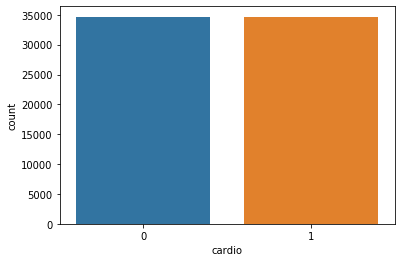

In [10]:
sns.countplot(df_cardio['cardio'])

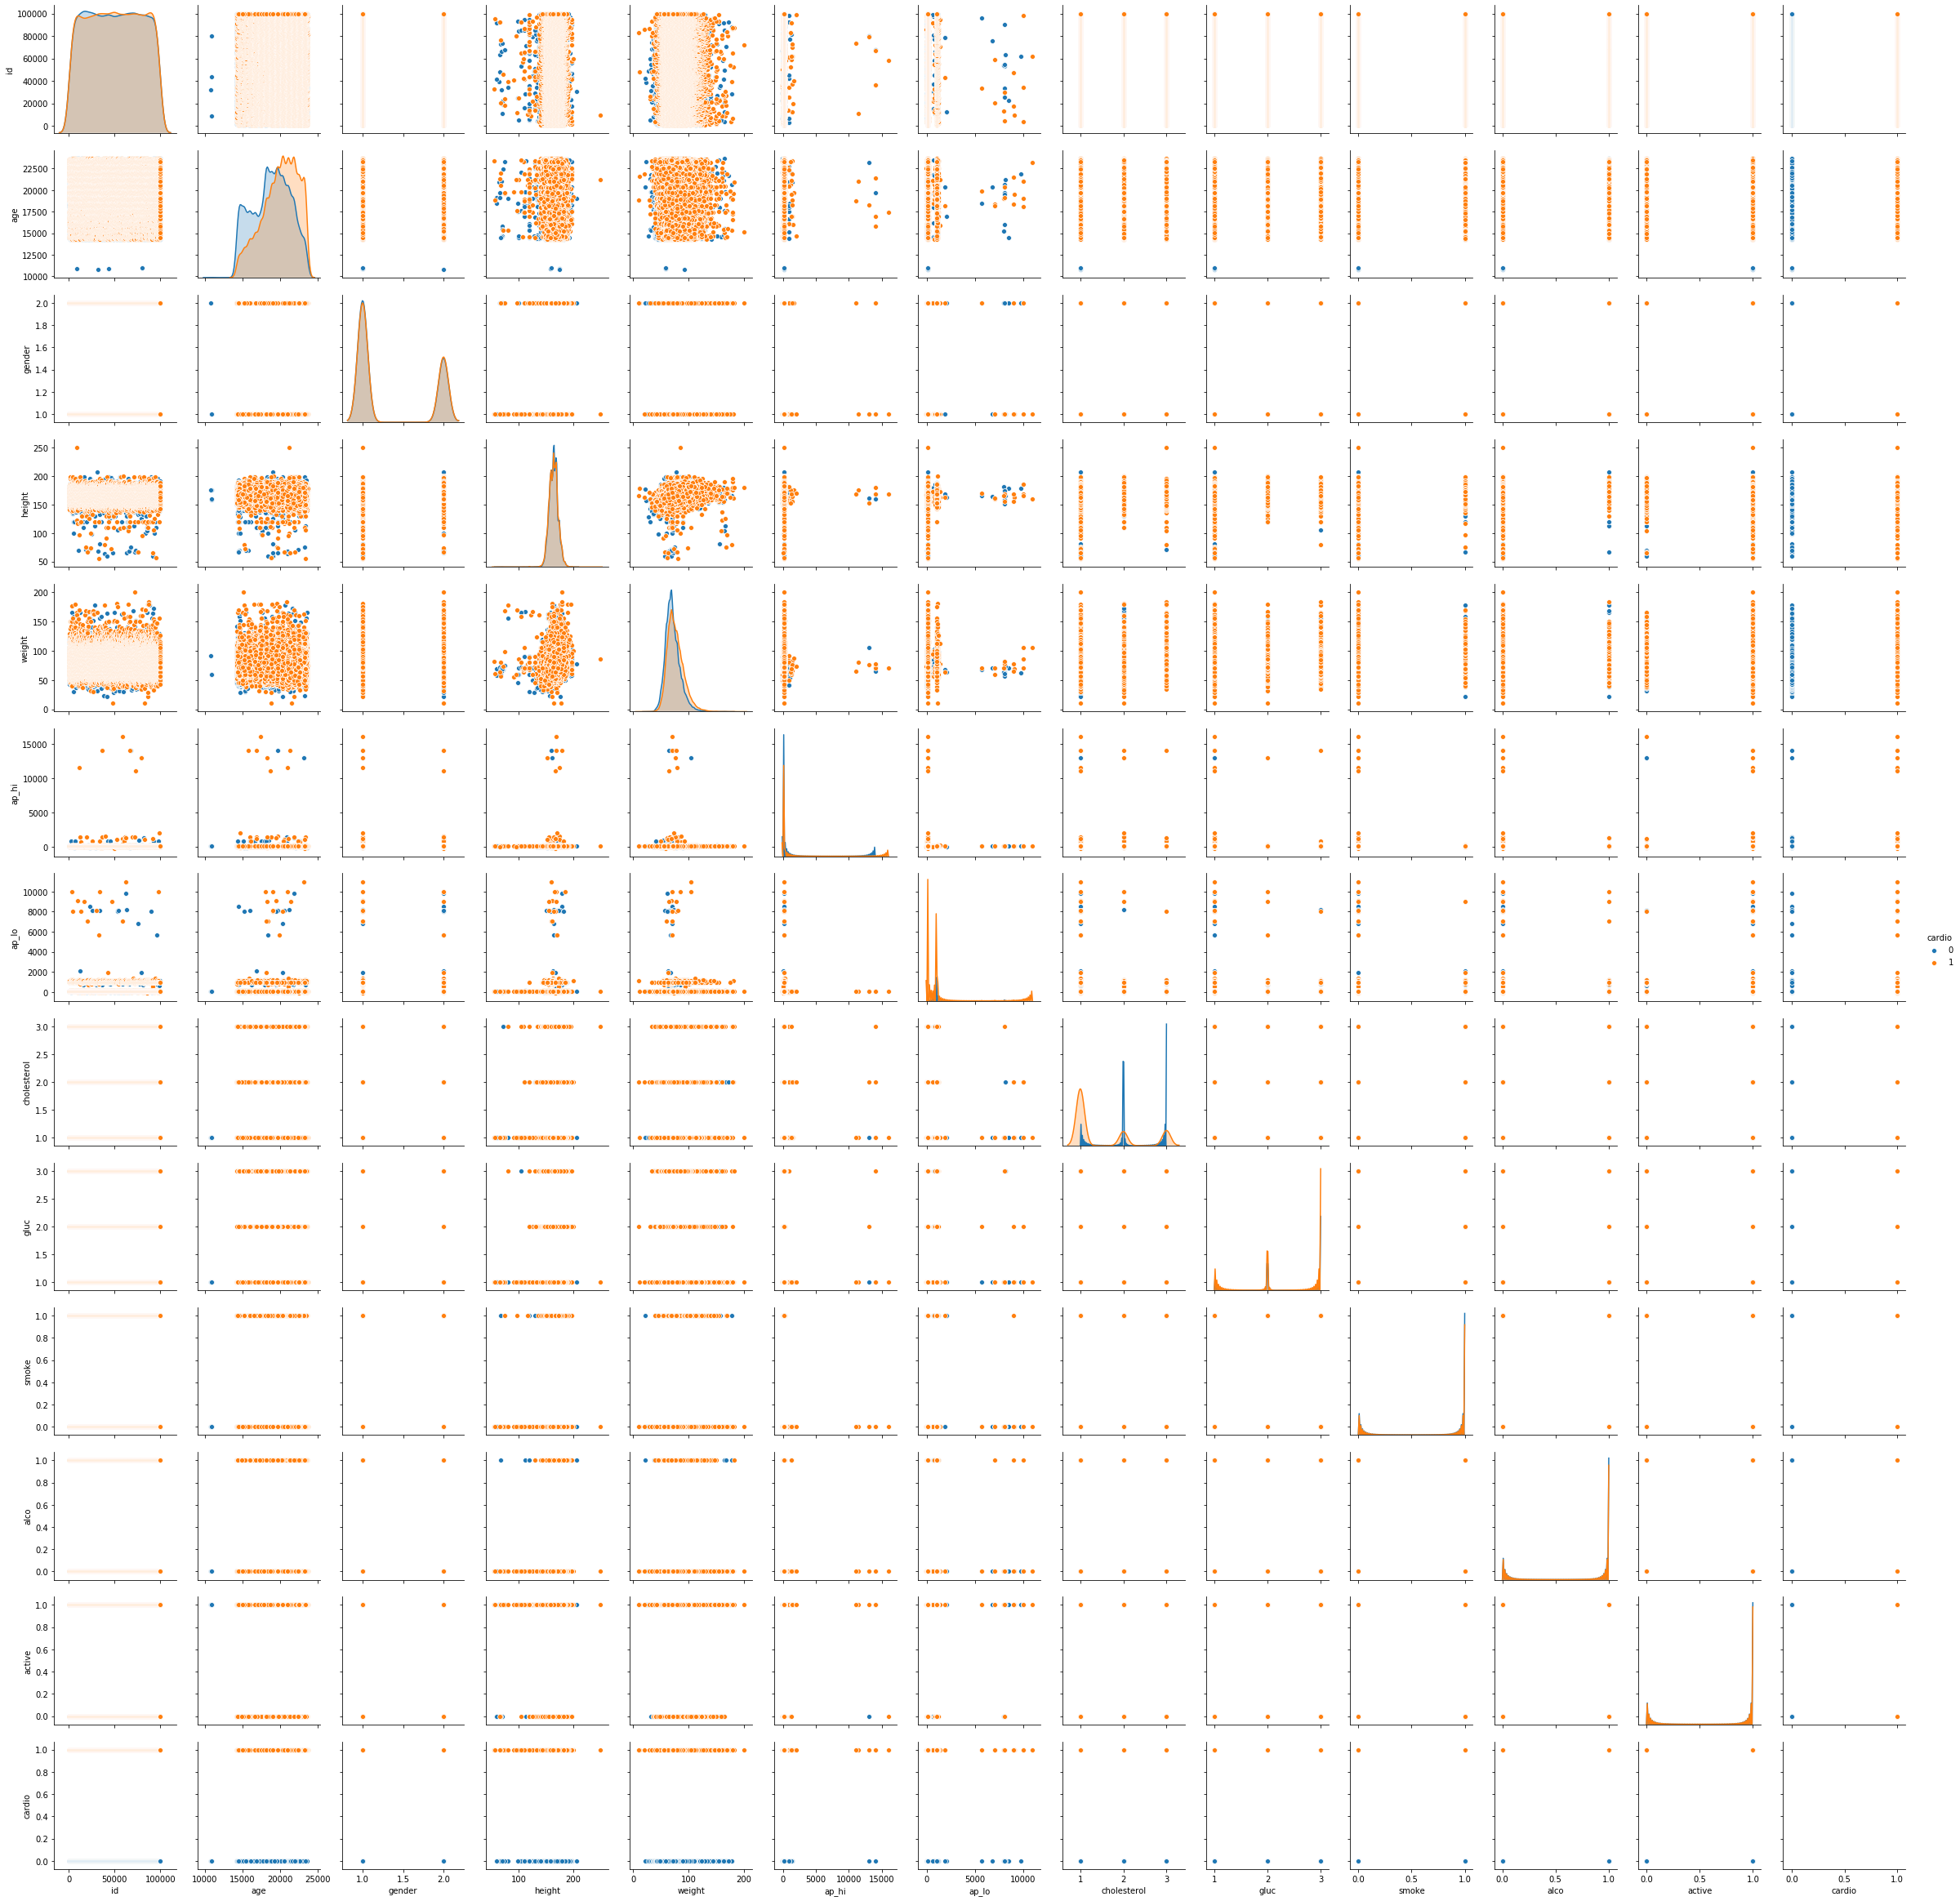

In [11]:
sns.pairplot(df_cardio,hue='cardio')

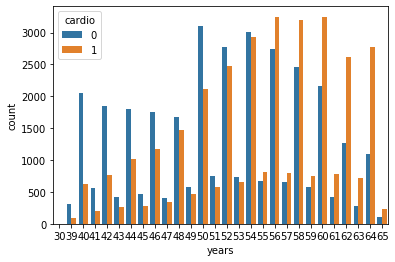

In [12]:
df_cardio['years'] = ( df_cardio['age'] / 365).round(0)   
df_cardio["years"] = pd.to_numeric(df_cardio["years"],downcast='integer')

sns.countplot(x='years', hue='cardio', data = df_cardio);

In [13]:
df_cardio.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
id,1.000000,0.003587,0.003773,-0.003735,-0.001549,0.003268,-0.002757,0.006400,0.002543,-0.003294,0.000384,0.002700,0.004269,0.003247
age,0.003587,1.000000,-0.023150,-0.081304,0.054409,0.020663,0.017717,0.154343,0.099095,-0.047680,-0.029435,-0.009926,0.238095,0.999089
gender,0.003773,-0.023150,1.000000,0.499373,0.155649,0.005980,0.015396,-0.036335,-0.021154,0.337608,0.171015,0.006241,0.008592,-0.023360
height,-0.003735,-0.081304,0.499373,1.000000,0.290333,0.005492,0.006215,-0.050632,-0.018929,0.187899,0.094164,-0.005974,-0.011015,-0.081233
weight,-0.001549,0.054409,0.155649,0.290333,1.000000,0.030665,0.043652,0.141901,0.107255,0.068304,0.067259,-0.016514,0.182094,0.054366
ap_hi,0.003268,0.020663,0.005980,0.005492,0.030665,1.000000,0.015919,0.023573,0.011821,-0.000933,0.001385,0.000032,0.054211,0.020691
ap_lo,-0.002757,0.017717,0.015396,0.006215,0.043652,0.015919,1.000000,0.024023,0.010895,0.004948,0.010764,0.004962,0.065290,0.017823
cholesterol,0.006400,0.154343,-0.036335,-0.050632,0.141901,0.023573,0.024023,1.000000,0.451741,0.010237,0.036015,0.009708,0.220752,0.154297
gluc,0.002543,0.099095,-0.021154,-0.018929,0.107255,0.011821,0.010895,0.451741,1.000000,-0.004608,0.011442,-0.007301,0.089062,0.098985
smoke,-0.003294,-0.047680,0.337608,0.187899,0.068304,-0.000933,0.004948,0.010237,-0.004608,1.000000,0.339709,0.025794,-0.015225,-0.047936


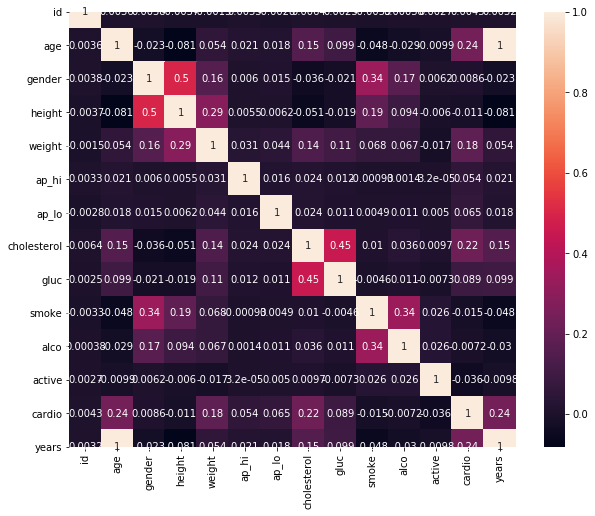

In [14]:
plt.figure(figsize=(10,8))  
sns.heatmap(df_cardio.corr(), annot=True)

In [15]:
#Check for presence of outliers
from scipy.stats import zscore
z_scr=zscore(df_cardio)
df_cardio_final=df_cardio.loc[(abs(z_scr)<3).all(axis=1)]
print(df_cardio_final.shape)

(55140, 14)


In [16]:
df_cardio.shape

(69301, 14)

In [17]:
#dropping id and years column
df_cardio_final = df_cardio_final.drop('years', axis=1)

df_cardio_final = df_cardio_final.drop('id', axis=1)

In [18]:
#Split the data into feature data and target data
X = df_cardio_final.iloc[:, :-1].values
Y = df_cardio_final.iloc[:, -1].values

In [19]:
X

array([[2.2469e+04, 1.0000e+00, 1.5500e+02, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [1.4648e+04, 1.0000e+00, 1.6300e+02, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [2.1901e+04, 1.0000e+00, 1.6500e+02, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       ...,
       [2.1074e+04, 1.0000e+00, 1.6500e+02, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [2.2431e+04, 1.0000e+00, 1.6300e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0540e+04, 1.0000e+00, 1.7000e+02, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00]])

In [20]:
Y

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [21]:
#Standard scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X)
df_x=sc.transform(X)
print(df_x)

[[ 1.22681158 -0.64578912 -1.17613827 ...  0.          0.
   0.50034002]
 [-1.93853213 -0.64578912 -0.11840511 ...  0.          0.
   0.50034002]
 [ 0.99692854 -0.64578912  0.14602818 ...  0.          0.
   0.50034002]
 ...
 [ 0.66222208 -0.64578912  0.14602818 ...  0.          0.
   0.50034002]
 [ 1.21143208 -0.64578912 -0.11840511 ...  0.          0.
  -1.99864084]
 [ 0.44609965 -0.64578912  0.8071114  ...  0.          0.
   0.50034002]]


In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier

In [24]:
KNN=KNeighborsClassifier(n_neighbors=5)
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier()
GNB=GaussianNB()
RFC=RandomForestClassifier(n_estimators=100)
GBC=GradientBoostingClassifier()
ABC=AdaBoostClassifier()
ETC=ExtraTreesClassifier()

In [25]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('GaussianNB', GNB))
models.append(('RandomForestClassifier', RFC))
models.append(('GradientBoostingClassifier', GBC))
models.append(('ExtraTreesClassifier',ETC))
models.append(('AdaBoostClassifier',ABC))

*********************** KNeighborsClassifier ***********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


Accuracy_score =  0.6902975847003545


Cross_Val_Score =  0.6951755973518798


roc_auc_score =  0.6896266121230127


classification_report
               precision    recall  f1-score   support

           0       0.69      0.71      0.70      6251
           1       0.69      0.67      0.68      5880

    accuracy                           0.69     12131
   macro avg       0.69      0.69      0.69     12131
weighted avg       0.69      0.69      0.69     12131



[[4448 1803]
 [1954 3926]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*********************** SVC ***********************


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf

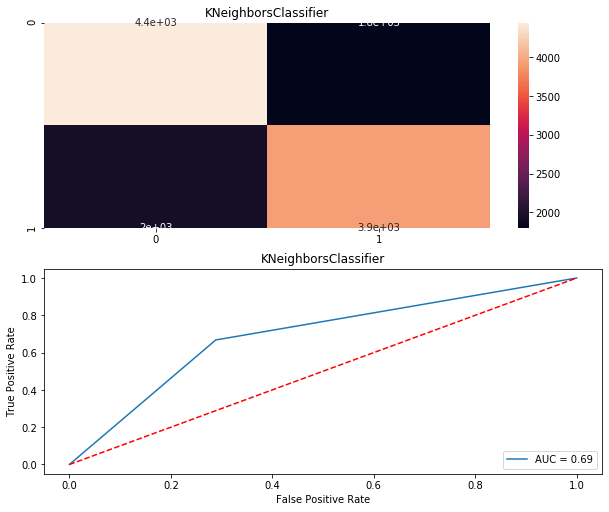

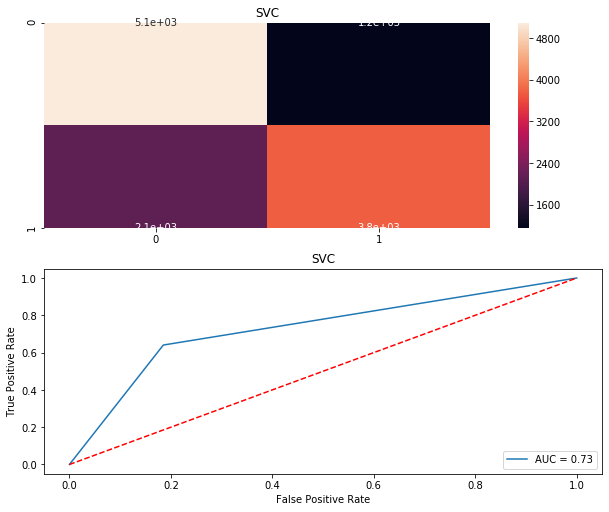

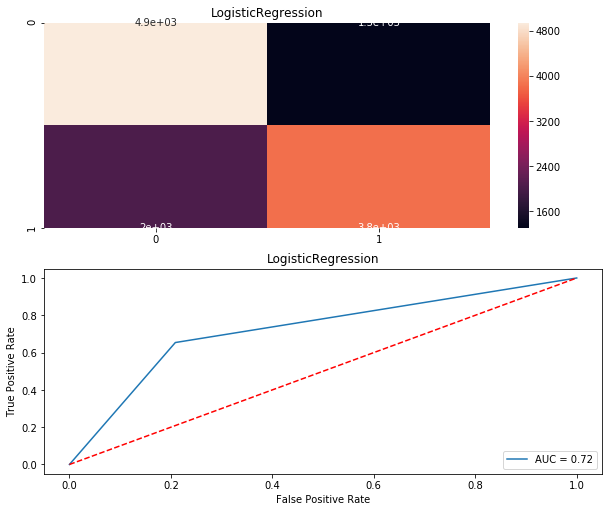

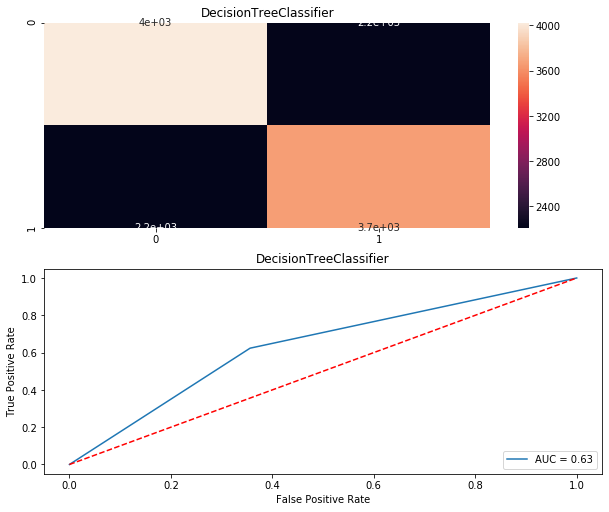

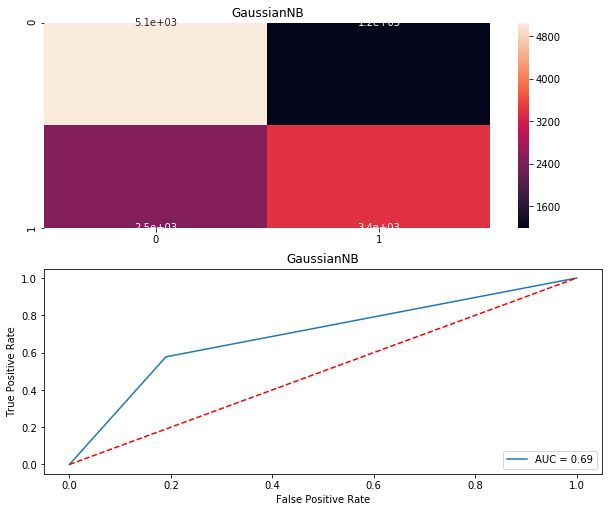

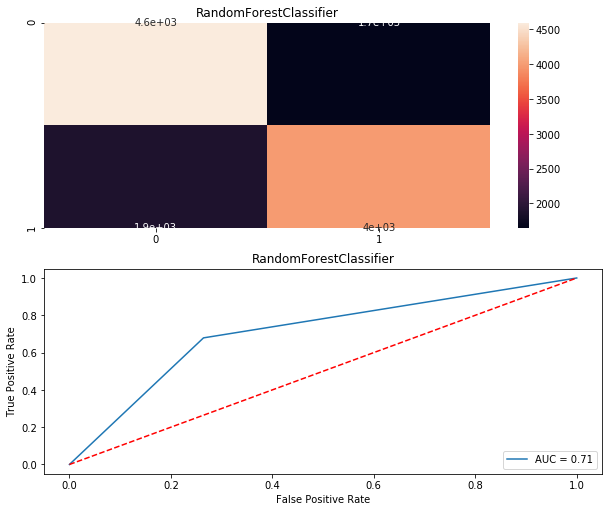

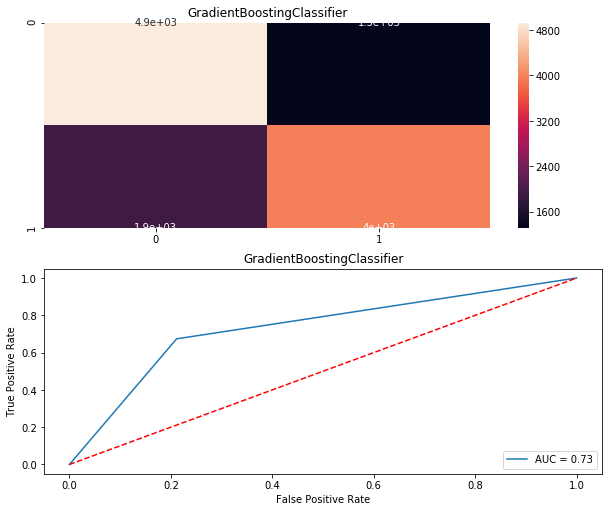

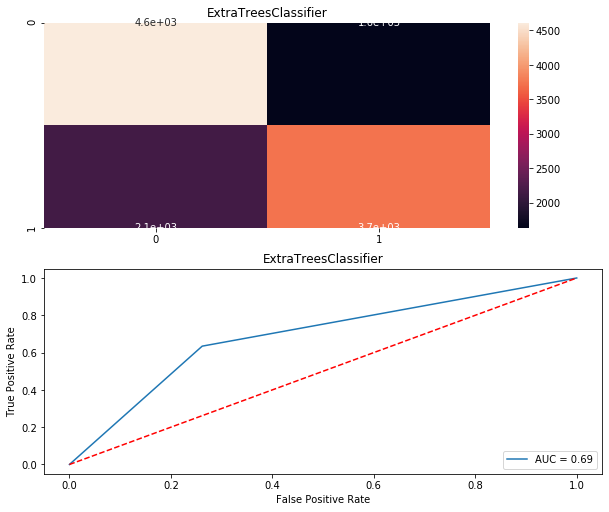

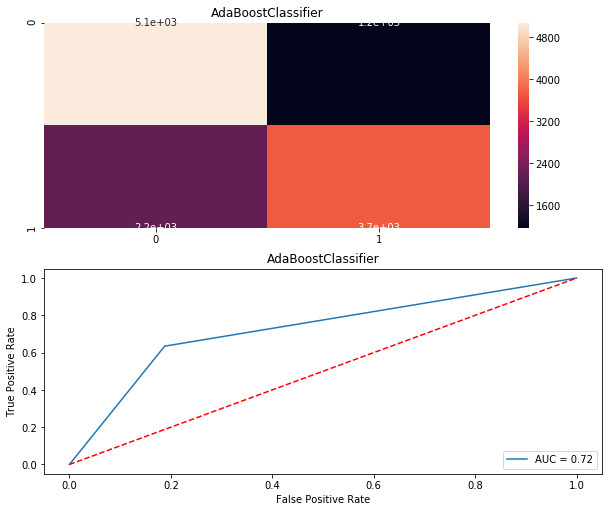

In [27]:
Model = []
score = []
cvs=[]
rocscore=[]
for name,model in models:
    print('***********************',name,'***********************')
    print('\n')
    Model.append(name)
    x_train,x_test,y_train,y_test=train_test_split(df_x,Y,random_state=42,test_size=0.22,stratify=Y)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, df_x, Y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [28]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score ,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,69.029758,69.517560,68.962661
1,SVC,73.036023,73.313369,72.769290
2,LogisticRegression,72.467233,72.573449,72.257248
3,DecisionTreeClassifier,63.407798,63.253529,63.376822
4,GaussianNB,69.705713,69.996366,69.350066
5,RandomForestClassifier,70.818564,70.993807,70.731692
6,GradientBoostingClassifier,73.299810,73.304327,73.124167
7,ExtraTreesClassifier,68.798945,68.547304,68.640284
8,AdaBoostClassifier,72.607370,72.921655,72.335188


In [29]:
#Lets save Gradient Boosting Classifier the above model as it provides highest score
from sklearn.externals import joblib

#Save the model as pickle in a file
joblib.dump(GBC,'Model_cardioVascular_Prediction.pkl')

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['Model_cardioVascular_Prediction.pkl']